In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from api_keys import api_key
from citipy import citipy

In [2]:
output_data_file = "output_data/cities.csv"

In [3]:
cities = []
cityname=[]

In [4]:
lat = np.random.uniform(low=-90.00, high=90.00, size=600)
lon = np.random.uniform(low=-180.00, high=180.00, size=600)
lat_long = zip(lat, lon)

In [5]:
for c in lat_long:
    cities.append(citipy.nearest_city(c[0], c[1]))

In [6]:
for city in cities:
    name = city.city_name
    cityname.append(name)

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
lon = []
name = []
temp = []
humidity = []
cloud = []
wind = []

for city in cityname:
    q = url + "appid=" + api_key + "&q=" + city + "&units=metric"
    response = requests.get(q)
    if response.status_code == 200:
        response = response.json()
        wind.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        name.append(response["name"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])

In [8]:
city_df = pd.DataFrame({"Name of City": name, "Lat": lat, "Long": lon, "Temperature": temp,
                        "Humidity": humidity, "Clouds": cloud, "Winds": wind})
city_df.head()

,Name of City,Lat,Long,Temperature,Humidity,Clouds,Winds
0,Vaini,15.34,74.49,23.75,93,46,0.50
1,Nikolskoye,59.70,30.79,9.76,71,75,5.00
2,Chuguyevka,44.17,133.87,8.15,96,0,1.03
3,Hithadhoo,-0.60,73.08,28.75,75,48,4.87
4,Yerbogachen,61.28,108.01,-0.25,91,100,7.01


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_df.to_csv("WeatherPyData.csv")
city_df.head()

,Name of City,Lat,Long,Temperature,Humidity,Clouds,Winds
0,Vaini,15.34,74.49,23.75,93,46,0.50
1,Nikolskoye,59.70,30.79,9.76,71,75,5.00
2,Chuguyevka,44.17,133.87,8.15,96,0,1.03
3,Hithadhoo,-0.60,73.08,28.75,75,48,4.87
4,Yerbogachen,61.28,108.01,-0.25,91,100,7.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

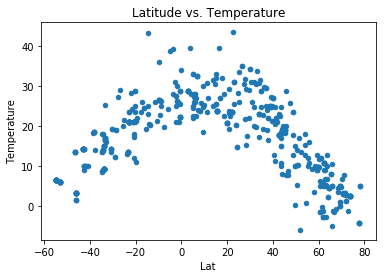

In [10]:
city_df.plot.scatter(x="Lat", y="Temperature", title="Latitude vs. Temperature")
plt.savefig('LatvsTemp.png')

#### Latitude vs. Humidity Plot

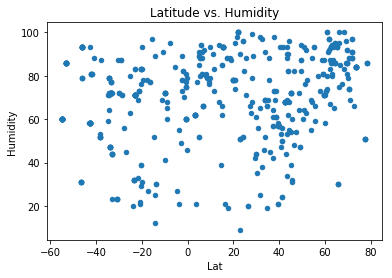

In [11]:
city_df.plot.scatter(x="Lat", y="Humidity", title="Latitude vs. Humidity")
plt.savefig('LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

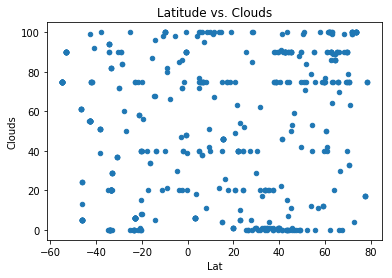

In [12]:
city_df.plot.scatter(x="Lat", y="Clouds", title="Latitude vs. Clouds")
plt.savefig('LatvsClouds.png')

#### Latitude vs. Wind Speed Plot

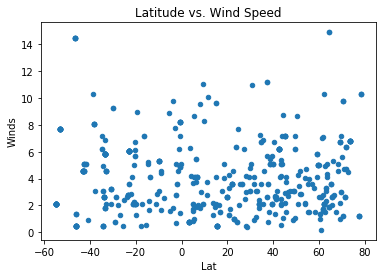

In [13]:
city_df.plot.scatter(x="Lat", y="Winds", title="Latitude vs. Wind Speed")
plt.savefig('LatvsWind.png')